In [1]:
import pandas as pd
from shapely.geometry import Point
pd.set_option('max_columns',500)

In [2]:
muni09 = pd.read_csv('E:\Transit-Casa-Alex\Input\MUNI Rail/MUNI Rail Ridership.csv')
muni16 = pd.read_csv('E:\Transit-Casa-Alex\Input\MUNI Rail/MUNI Rail Ridership 2016.csv')

In [3]:
muni09.head()

,Route,STOP,Boardings,Alightings,DIR,STOP ID,STOP NAME,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,J-CHURCH,Embarc Sta,0,"1,303",1,6992,Metro Embarcadero Station,NaN,NaN,NaN,NaN
1,J-CHURCH,Green Div Yard,0,412,0,7155,SAN JOSE AVE & GENEVA AVE,NaN,NaN,NaN,NaN
2,KT-INGLESIDE/THIRD,ByShre&Sundle,0,561,1,7396,Bay Shore Blvd & Sunnydale Ave,NaN,NaN,NaN,NaN
3,KT-INGLESIDE/THIRD,Metro Terminal,0,"1,113",0,5418,Balboa Park BART/Mezzanine Level,NaN,NaN,NaN,NaN
4,L-TARAVAL,46th&Ulloa,0,226,0,3600,46th Ave & Ulloa St,NaN,NaN,NaN,NaN


In [4]:
muni16.head()

,ROUTE,DIRECTION,STOP NAME,STOP ID,STOP SEQ,Time Period,Total Boardings,Total Alightings,Total Train Load,Number of Trips in Time Period,Average Boardings,Average Alightings,Average Train Load,Stop Latitude,Stop Longitude
0,J-Church,INBOUND,San Jose Ave & Geneva Ave,7778,1,7 - Owl,4.4,-,4.4,9,0.5,-,0.5,37.721240,-122.44622
1,J-Church,INBOUND,San Jose Ave & Ocean Ave,6275,2,7 - Owl,2.2,-,6.5,9,0.2,-,0.7,37.722862,-122.44479
2,J-Church,INBOUND,San Jose Ave & Santa Ynez Ave,6288,3,7 - Owl,2.2,-,8.7,9,0.2,-,1.0,37.725680,-122.44244
3,J-Church,INBOUND,San Jose Ave & Santa Rosa Ave,6284,4,7 - Owl,8.7,-,17.5,9,1.0,-,1.9,37.728992,-122.43992
4,J-Church,INBOUND,San Jose Ave/Glen Park Station,4787,5,7 - Owl,2.2,4.4,15.3,9,0.2,0.5,1.7,37.732525,-122.43342


In [61]:
muni16 = muni16.groupby(by = ['ROUTE','STOP NAME','DIRECTION','STOP ID'],as_index = False).sum()
len(muni16)
muni16 = muni16.sort_values(by = 'STOP NAME')

In [41]:
muni16.to_csv('muni16_sorted.csv')

In [23]:
muni16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 307
Data columns (total 15 columns):
ROUTE                             308 non-null object
STOP NAME                         308 non-null object
DIRECTION                         308 non-null object
STOP ID                           308 non-null int64
STOP SEQ                          308 non-null int64
Time Period                       308 non-null object
 Total Boardings                  308 non-null object
 Total Alightings                 308 non-null object
 Total Train Load                 308 non-null object
Number of Trips in Time Period    308 non-null int64
 Average Boardings                308 non-null object
 Average Alightings               308 non-null object
 Average Train Load               308 non-null object
Stop Latitude                     308 non-null float64
Stop Longitude                    308 non-null float64
dtypes: float64(2), int64(3), object(10)
memory usage: 38.5+ KB


In [38]:
muni16.head()

,ROUTE,STOP NAME,DIRECTION,STOP ID,STOP SEQ,Time Period,Total Boardings,Total Alightings,Total Train Load,Number of Trips in Time Period,Average Boardings,Average Alightings,Average Train Load,Stop Latitude,Stop Longitude
0,J-Church,30th St & Dolores St,INBOUND,3537,7,7 - Owl,13.4,-,30.9,9,1.5,-,3.4,37.742306,-122.42403
1,J-Church,30th St & Dolores St,OUTBOUND,3538,20,7 - Owl,-,-,8.2,7,-,-,1.2,37.742170,-122.42445
2,J-Church,Church St & 14th St,OUTBOUND,7316,8,7 - Owl,7.6,2.1,14.5,7,1.1,0.3,2.1,37.767784,-122.42899
3,J-Church,Church St & 16th St,INBOUND,3985,18,7 - Owl,-,-,100.4,9,-,-,11.2,37.764385,-122.42861
4,J-Church,Church St & 16th St,OUTBOUND,3984,9,7 - Owl,-,4.1,10.4,7,-,0.6,1.5,37.764620,-122.42872


In [33]:
muni16.head()

,ROUTE,DIRECTION,STOP NAME,STOP ID,STOP SEQ,Time Period,Total Boardings,Total Alightings,Total Train Load,Number of Trips in Time Period,Average Boardings,Average Alightings,Average Train Load,Stop Latitude,Stop Longitude
0,J-Church,INBOUND,San Jose Ave & Geneva Ave,7778,1,7 - Owl,4.4,-,4.4,9,0.5,-,0.5,37.721240,-122.44622
1,J-Church,INBOUND,San Jose Ave & Ocean Ave,6275,2,7 - Owl,2.2,-,6.5,9,0.2,-,0.7,37.722862,-122.44479
2,J-Church,INBOUND,San Jose Ave & Santa Ynez Ave,6288,3,7 - Owl,2.2,-,8.7,9,0.2,-,1.0,37.725680,-122.44244
3,J-Church,INBOUND,San Jose Ave & Santa Rosa Ave,6284,4,7 - Owl,8.7,-,17.5,9,1.0,-,1.9,37.728992,-122.43992
4,J-Church,INBOUND,San Jose Ave/Glen Park Station,4787,5,7 - Owl,2.2,4.4,15.3,9,0.2,0.5,1.7,37.732525,-122.43342


In [58]:
muni09.head()

,Route,STOP,Boardings,Alightings,DIR,Unnamed: 5
0,59-POWELL/MASON,Taylor&Bay,"3,527",0,1,NaN
1,59-POWELL/MASON,Taylor&Colmbs,49,4,1,NaN
2,59-POWELL/MASON,Colmbs&Lmbrd,251,18,1,NaN
3,59-POWELL/MASON,Mason&Grnwch,108,10,1,NaN
4,59-POWELL/MASON,Mason&Filbert,59,5,1,NaN


In [71]:
store = pd.HDFStore("E:/Transit_Casa/Output/sfmuni_monthly_ts.h5")

df = store.get('rs_day')
df = df[df['MONTH'].isin(pd.date_range('2009-01-01','2009-12-01'))]

In [72]:
pd.set_option('max_columns',500)
df.head()

,MONTH,DOW,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
0,2009-06-01,1,SFMTA,016AX,0,3,12,11,13,2,13.0,3612,NORIEGA A EXP,3,48th Avenue,10.666667,2.0,Cyril Magnin St & Market St,5TH ST NORTH&MARKET ST NW,37.784011,-122.408210,0,1,1.0,-4.083968,-0.189805,0.0,50.597210,0.00,0.000000,0.00,50.597210,0.000,0.000,0.00,0.00,0.00,0.00,0.671212,212.620346,1.181818,1.181818,212.620346,0.000000,14.251523,20.181656,425.240693,140.166169,75.003247,0.0,19.716667,0.0,0.0,177.545455,0.001443,0.0,0.0
1,2009-06-01,1,SFMTA,016AX,0,4,12,0,13,0,13.0,7305,NORIEGA A EXP,3,48th Avenue,10.666667,2.0,Eddy St & Cyril Magnin St,nan,37.784386,-122.408599,0,0,NaN,NaN,NaN,0.0,NaN,2.99,NaN,2.99,NaN,0.546,0.546,10.96,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-06-01,1,SFMTA,016AX,0,5,12,11,13,2,13.0,6733,NORIEGA A EXP,3,48th Avenue,10.666667,2.0,Turk St & Taylor St,TURK ST&TAYLOR ST N-MB/BZ,37.783387,-122.409895,0,0,0.0,-0.104658,-0.083203,0.0,0.286000,11.05,15.190106,11.05,15.476106,1.716,1.716,9.32,6.78,9.32,6.65,0.739394,3.309091,0.000000,212.620346,215.929437,28.065886,4.450685,0.281667,6.618182,0.269455,0.222182,0.0,2.600000,0.0,0.0,177.545455,0.259610,0.0,0.0
3,2009-06-01,1,SFMTA,016AX,0,6,12,11,13,2,13.0,6719,NORIEGA A EXP,3,48th Avenue,10.666667,2.0,Turk St & Jones St,TURK ST&JONES ST NW-FS/BZ,37.783039,-122.412577,0,0,0.0,-0.286771,-0.281673,0.0,0.067955,12.74,10.124777,12.74,10.192732,1.937,1.937,9.12,11.48,9.12,11.40,0.643074,0.531818,0.000000,215.929437,216.461255,32.173486,2.842919,0.059091,1.063636,0.850909,0.806591,0.0,0.937013,0.0,0.0,177.545455,0.263650,0.0,0.0
4,2009-06-01,1,SFMTA,016AX,0,7,12,11,13,2,13.0,6721,NORIEGA A EXP,3,48th Avenue,10.666667,2.0,Turk St & Leavenworth St,TURK ST&LEAVENWORTH ST NW,37.782835,-122.414217,0,0,0.0,-0.230974,-0.212814,0.0,0.236082,7.80,8.448762,7.80,8.684844,1.183,1.183,9.10,8.40,9.10,8.17,0.643074,4.445887,0.000000,216.461255,220.907143,19.697974,2.593526,0.492424,8.891775,0.263377,0.187403,0.0,8.047619,0.0,0.0,177.545455,0.264299,0.0,0.0


In [59]:
pd.merge(muni09,df,left_on= 'STOP',right_on = 'STOPNAME')

,Route,STOP,Boardings,Alightings,DIR,Unnamed: 5,MONTH,DOW,AGENCY_ID,STOP_ID,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS


In [74]:
df2 = df[['ROUTE_SHORT_NAME','STOPNAME','STOP_ID','DIR']].groupby(by=['ROUTE_SHORT_NAME','DIR','STOPNAME'], as_index = False).first()
df2 =df2.sort_values(by= 'STOPNAME')
df2.to_csv('bus_sorted.csv')

# Start Here


In [424]:
muni09 = pd.read_csv('E:/Transit-Casa-Alex/Output/Processed MUNI Rail/2009_MUNI_Rail.csv')

In [425]:
muni16 = pd.read_csv('E:/Transit-Casa-Alex/Output/Processed MUNI Rail/2016_MUNI_Rail.csv')

In [426]:
import geopandas as gp
%matplotlib inline
stops = gp.read_file('E:/Transit-Casa-Alex/Input/MUNI Rail/2009_MUNI_Rail_Stops.shp')

OSError: no such file or directory: 'E:/Transit-Casa-Alex/Input/MUNI Rail/2009_MUNI_Rail_Stops.shp'

In [238]:
muni09.head()

,Boardings,Alightings,STOP_ID
0,132,58,3537.0
1,60,170,3538.0
2,726,810,7316.0
3,198,239,3985.0
4,286,340,3987.0


In [239]:
muni16.head()

,STOP_ID,Boardings,Alightings,Latitude,Longitude
0,7778,4.4,,37.721240,-122.44622
1,6275,2.2,,37.722862,-122.44479
2,6288,2.2,,37.725680,-122.44244
3,6284,8.7,,37.728992,-122.43992
4,4787,2.2,4.4,37.732525,-122.43342


In [240]:
stops.head()

,Alightings,Boardings,STOP_ID,STOP_LAT,STOP_LON,geometry
0,270,"1,223",3212.0,37.763888,-122.466245,POINT (-122.4662450000009 37.76388799999987)
1,255,77,3266.0,37.743124,-122.471297,POINT (-122.4712969999989 37.74312400000014)
2,77,280,3267.0,37.743069,-122.471405,POINT (-122.4714049999991 37.7430690000001)
3,111,22,3268.0,37.741525,-122.471192,POINT (-122.4711919999996 37.74152499999985)
4,13,47,3269.0,37.741484,-122.471300,POINT (-122.4712999999995 37.7414840000001)


In [241]:
muni09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 3 columns):
Boardings     323 non-null object
Alightings    323 non-null object
STOP_ID       319 non-null float64
dtypes: float64(1), object(2)
memory usage: 7.6+ KB


In [242]:
stops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
Alightings    323 non-null object
Boardings     323 non-null object
STOP_ID       319 non-null float64
STOP_LAT      317 non-null float64
STOP_LON      317 non-null float64
geometry      323 non-null object
dtypes: float64(3), object(3)
memory usage: 15.2+ KB


In [243]:
len(muni09)

323

In [244]:
len(stops)

323

In [255]:
len(muni.STOP_ID.unique())

243

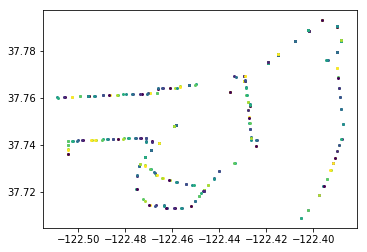

In [264]:
muni.plot()

In [257]:
len(stops)

323

In [251]:
import numpy as np

In [266]:
muni.head()

,STOP_ID,geometry,Boardings,Alightings
0,3212.0,POINT (-122.4662450000009 37.76388799999987),"1,223",270
1,3266.0,POINT (-122.4712969999989 37.74312400000014),77,255
2,3267.0,POINT (-122.4714049999991 37.7430690000001),280,77
3,3268.0,POINT (-122.4711919999996 37.74152499999985),22,111
4,3269.0,POINT (-122.4712999999995 37.7414840000001),47,13


In [269]:
muni09[muni09['STOP_ID'] == 3269]

,Boardings,Alightings,STOP_ID
137,47,13,3269.0


In [272]:
stops[stops['STOP_ID'] == 3269]

,Alightings,Boardings,STOP_ID,STOP_LAT,STOP_LON,geometry
4,13,47,3269.0,37.741484,-122.4713,POINT (-122.4712999999995 37.7414840000001)


In [268]:
muni[muni['STOP_ID'] == 3269]

,STOP_ID,geometry,Boardings,Alightings
4,3269.0,POINT (-122.4712999999995 37.7414840000001),47,13


In [262]:
len(stops.STOP_ID.unique())

243

In [265]:
len(muni)

645

In [198]:
len(muni09)

323

In [179]:
len(muni16)

240

In [180]:
len(muni09)

323

In [181]:
len(muni16.STOP_ID.unique())

240

In [427]:
muni16 = muni16.convert_objects(convert_numeric = True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [74]:
muni16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
STOP_ID       2127 non-null int64
Boardings     1850 non-null float64
Alightings    1855 non-null float64
Latitude      2127 non-null float64
Longitude     2127 non-null float64
dtypes: float64(4), int64(1)
memory usage: 83.2 KB


In [428]:
muni16 = muni16.groupby(by = 'STOP_ID',as_index = False).agg({'Boardings':'sum','Alightings':'sum','Latitude':'first','Longitude':'first'})

In [85]:
muni16.head()

,STOP_ID,Boardings,Longitude,Latitude,Alightings
0,3212,1046.3,-122.466240,37.763912,292.4
1,3266,119.6,-122.471300,37.743122,313.8
2,3267,240.7,-122.471405,37.743070,92.3
3,3268,16.5,-122.471190,37.741524,233.4
4,3269,90.4,-122.471300,37.741486,23.3


In [429]:
muni16['geometry'] = [Point(xy) for xy in zip(muni16.Longitude, muni16.Latitude)]

In [430]:
muni09.head()

,Boardings,Alightings,STOP_ID
0,132,58,3537
1,60,170,3538
2,726,810,7316
3,198,239,3985
4,286,340,3987


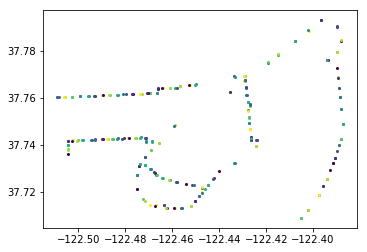

In [431]:
muni16_geo = gp.GeoDataFrame(muni16)
muni16_geo.plot()

# This is where the 2009 MUNI rail stops shapefile was created

In [90]:
store = pd.HDFStore('E:\Transit_Casa\Output/gtfs1.h5')

In [5]:
store.items

<bound method HDFStore.items of <class 'pandas.io.pytables.HDFStore'>
File path: E:\Transit_Casa\Output/gtfs1.h5
/sfmuni            frame_table  (typ->appendable_multi,nrows->1839616,ncols->38,indexers->[index],dc->[AGENCY_ID,ARRIVAL_TIME_S,BLOCK_ID,DATE,DEPARTURE_TIME_S,DIR,DOW,DWELL_S,EOL,FARE,HEADWAY_S,MONTH,OBSERVED,ROUTE_ID,ROUTE_LONG_NAME,ROUTE_SHORT_NAME,ROUTE_TYPE,RUNSPEED_S,RUNTIME_S,SCHED_DATES,SEQ,SERVMILES_S,SHAPE_DIST,SHAPE_ID,SOL,STOPNAME,STOP_ID,STOP_LAT,STOP_LON,TOD,TOTSPEED_S,TOTTIME_S,TRIP,TRIP_HEADSIGN,TRIP_ID,TRIP_STOPS])>

In [29]:
store = pd.HDFStore('E:\Transit_Casa\Output/gtfs1.h5') 

In [30]:
store.items

<bound method HDFStore.items of <class 'pandas.io.pytables.HDFStore'>
File path: E:\Transit_Casa\Output/gtfs1.h5
/sfmuni            frame_table  (typ->appendable_multi,nrows->1839616,ncols->38,indexers->[index],dc->[AGENCY_ID,ARRIVAL_TIME_S,BLOCK_ID,DATE,DEPARTURE_TIME_S,DIR,DOW,DWELL_S,EOL,FARE,HEADWAY_S,MONTH,OBSERVED,ROUTE_ID,ROUTE_LONG_NAME,ROUTE_SHORT_NAME,ROUTE_TYPE,RUNSPEED_S,RUNTIME_S,SCHED_DATES,SEQ,SERVMILES_S,SHAPE_DIST,SHAPE_ID,SOL,STOPNAME,STOP_ID,STOP_LAT,STOP_LON,TOD,TOTSPEED_S,TOTTIME_S,TRIP,TRIP_HEADSIGN,TRIP_ID,TRIP_STOPS])>

In [31]:
df = store.get('sfmuni')

In [32]:
df.ROUTE_TYPE.unique()

array([3, 5, 0, 1], dtype=int64)

In [101]:
rail_stops = df[df['ROUTE_TYPE'] == 0]

In [102]:
rail_stops.ROUTE_SHORT_NAME.unique()

array(['F', 'J', 'L', 'M', 'N', 'S', 'T', 'K'], dtype=object)

In [103]:
rail_stops.head()

,,AGENCY_ID,ARRIVAL_TIME_S,BLOCK_ID,DATE,DEPARTURE_TIME_S,DIR,DOW,DWELL_S,EOL,FARE,HEADWAY_S,MONTH,OBSERVED,ROUTE_ID,ROUTE_LONG_NAME,ROUTE_SHORT_NAME,ROUTE_TYPE,RUNSPEED_S,RUNTIME_S,SCHED_DATES,SEQ,SERVMILES_S,SHAPE_DIST,SHAPE_ID,SOL,STOPNAME,STOP_ID,STOP_LAT,STOP_LON,TOD,TOTSPEED_S,TOTTIME_S,TRIP,TRIP_HEADSIGN,TRIP_ID,TRIP_STOPS
5894,197237,SFMTA,2009-02-21 10:08:00,214388,2009-02-21,2009-02-21 10:08:00,0,1,0.0,0,1.5,11.0,2009-02-21,0,3725,MARKET & WHARVES,F,0,0.00,0.0,20090221-20090612,1,0.000,0.000000,34772,1,Jones St & Beach St,5184,37.807248,-122.417366,0900-1359,0.00,0.0,1008_1,Castro,2948224,1
5895,197238,SFMTA,2009-02-21 10:11:00,214388,2009-02-21,2009-02-21 10:11:00,0,1,0.0,0,1.5,11.0,2009-02-21,0,3725,MARKET & WHARVES,F,0,3.70,3.0,20090221-20090612,2,0.185,975.916380,34772,0,Beach St & Mason St,3092,37.807407,-122.414125,0900-1359,3.70,3.0,1008_1,Castro,2948224,1
5896,197239,SFMTA,2009-02-21 10:14:00,214388,2009-02-21,2009-02-21 10:14:00,0,1,0.0,0,1.5,11.0,2009-02-21,0,3725,MARKET & WHARVES,F,0,3.68,3.0,20090221-20090612,3,0.184,1946.538112,34772,0,Beach St & Stockton St,3095,37.807841,-122.410810,0900-1359,3.68,3.0,1008_1,Castro,2948224,1
5897,197240,SFMTA,2009-02-21 10:15:00,214388,2009-02-21,2009-02-21 10:15:00,0,1,0.0,0,1.5,11.0,2009-02-21,0,3725,MARKET & WHARVES,F,0,17.52,1.0,20090221-20090612,4,0.292,3487.305385,34772,0,The Embarcadero & Bay St,4502,37.806629,-122.406030,0900-1359,17.52,1.0,1008_1,Castro,2948224,1
5898,197241,SFMTA,2009-02-21 10:16:00,214388,2009-02-21,2009-02-21 10:16:00,0,1,0.0,0,1.5,11.0,2009-02-21,0,3725,MARKET & WHARVES,F,0,11.28,1.0,20090221-20090612,5,0.188,4477.449639,34772,0,The Embarcadero & Sansome St,4529,37.805022,-122.403314,0900-1359,11.28,1.0,1008_1,Castro,2948224,1


In [344]:
stops = rail_stops[['STOP_ID','DIR','STOP_LAT','STOP_LON','MONTH']]

In [307]:
stops.head()

,,STOP_ID,DIR,STOP_LAT,STOP_LON,MONTH
5894,197237,5184,0,37.807248,-122.417366,2009-02-21
5895,197238,3092,0,37.807407,-122.414125,2009-02-21
5896,197239,3095,0,37.807841,-122.410810,2009-02-21
5897,197240,4502,0,37.806629,-122.406030,2009-02-21
5898,197241,4529,0,37.805022,-122.403314,2009-02-21


In [345]:
stops09 = stops[stops['MONTH'].isin(pd.date_range(start = '2009-01-01',end = '2009-12-31'))]

In [309]:
stops09.head()

,,STOP_ID,DIR,STOP_LAT,STOP_LON,MONTH
5894,197237,5184,0,37.807248,-122.417366,2009-02-21
5895,197238,3092,0,37.807407,-122.414125,2009-02-21
5896,197239,3095,0,37.807841,-122.410810,2009-02-21
5897,197240,4502,0,37.806629,-122.406030,2009-02-21
5898,197241,4529,0,37.805022,-122.403314,2009-02-21


In [346]:
stops09 = stops09[['STOP_ID','STOP_LAT','DIR','STOP_LON']].groupby(by = ['STOP_ID','DIR'],as_index = False).mean()

In [311]:
len(stops09)

317

In [312]:
stops09.head()

,STOP_ID,DIR,STOP_LAT,STOP_LON
0,3092,0,37.807407,-122.414125
1,3095,0,37.807841,-122.410810
2,3212,1,37.763888,-122.466245
3,3266,0,37.743124,-122.471297
4,3267,1,37.743069,-122.471405


In [347]:
stops09['geometry'] = [Point(xy) for xy in zip(stops09.STOP_LON, stops09.STOP_LAT)]

In [352]:
muni09_merged = pd.merge(stops09,muni09, on = 'STOP_ID',how = 'right')

In [353]:
muni09_merged.head()

,STOP_ID,DIR,STOP_LAT,STOP_LON,geometry,Boardings,Alightings
0,3212,1.0,37.763888,-122.466245,POINT (-122.4662450000009 37.76388799999987),"1,223",270
1,3266,0.0,37.743124,-122.471297,POINT (-122.4712969999989 37.74312400000014),77,255
2,3267,1.0,37.743069,-122.471405,POINT (-122.4714049999991 37.7430690000001),280,77
3,3268,0.0,37.741525,-122.471192,POINT (-122.4711919999996 37.74152499999985),22,111
4,3269,1.0,37.741484,-122.471300,POINT (-122.4712999999995 37.7414840000001),47,13


In [354]:
len(muni09_merged)

329

In [373]:
muni09_merged['STOP_LAT'].loc[327] = 37.720949
muni09_merged['STOP_LAT'].loc[328] = 37.720949

muni09_merged['STOP_LON'].loc[327] = -122.446872
muni09_merged['STOP_LON'].loc[328] = -122.446872

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [376]:
muni09_merged[muni09_merged['STOP_ID'] == 7155]

,STOP_ID,DIR,STOP_LAT,STOP_LON,geometry,Boardings,Alightings
327,7155,NaN,37.720949,-122.446872,POINT (-122.446872 37.720949),0,412
328,7155,NaN,37.720949,-122.446872,POINT (-122.446872 37.720949),648,0


In [375]:
muni09_merged['geometry'] = [Point(xy) for xy in zip(muni09_merged.STOP_LON, muni09_merged.STOP_LAT)]

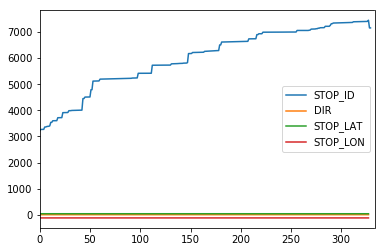

In [319]:
muni09_merged.plot()

In [377]:
muni09_geo = gp.GeoDataFrame(muni09_merged)

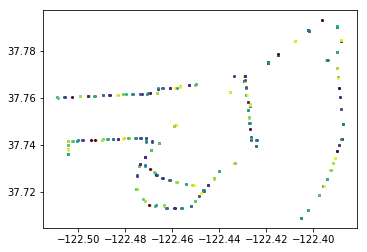

In [378]:
muni09_geo.plot()

In [380]:
muni09_geo.crs = {'init':'epsg:4326'}

In [360]:
len(muni09_geo)

329

In [399]:
muni09_geo.to_file('2009_MUNI_Rail_Stops.shp',driver = 'ESRI Shapefile')

In [324]:
buffers = gp.read_file('E:/Transit-Casa-Alex/Output/Buffers/Tenth/Buffers_Tenth_GCS.shp')

In [381]:
muni09_geo = muni09_geo.to_crs(buffers.crs)

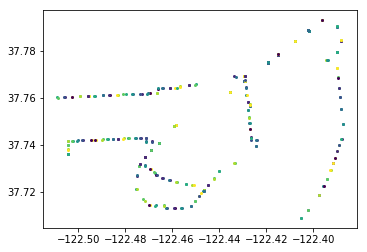

In [326]:
muni09_geo.plot()

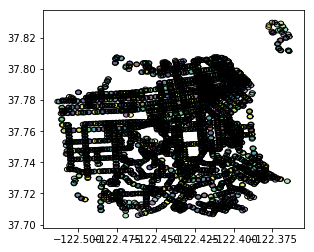

In [288]:
buffers.plot()

In [400]:
muni = gp.read_file('E:/Transit-Casa-Alex/Output/Processed MUNI Rail/2009_MUNI_Rail.shp')

In [404]:
muni.crs = buffers.crs

In [405]:
muni_joined = gp.sjoin(buffers[['geometry','STOP_ID']],muni[['Boardings','Alightings','geometry']],how = 'left')

In [ ]:
muni_joined

In [406]:
muni_joined.head()

,geometry,STOP_ID,index_right,Boardings,Alightings
0,POLYGON ((-122.4732708739641 37.72122058726108...,390,5.0,769,"3,052"
0,POLYGON ((-122.4732708739641 37.72122058726108...,390,268.0,"3,176",883
1,"POLYGON ((-122.475383794672 37.7651896197756, ...",392,NaN,NaN,NaN
2,POLYGON ((-122.4335617909149 37.72394397209937...,660,NaN,NaN,NaN
3,POLYGON ((-122.4239769029978 37.71922182363711...,913,NaN,NaN,NaN


In [412]:
muni_joined.Boardings = muni_joined.Boardings.convert_objects(convert_numeric = True)
muni_joined.Alightings = muni_joined.Alightings.convert_objects(convert_numeric = True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [421]:
muni_joined = muni_joined[['STOP_ID','Boardings','Alightings','geometry']].groupby(by = 'STOP_ID',as_index = False).agg({'geometry':'first','Boardings':'sum','Alightings':'sum'})

In [420]:
len(muni_joined)

3563

In [422]:
muni_joined.head()

,STOP_ID,Boardings,geometry,Alightings
0,390,769.0,POLYGON ((-122.4732708739641 37.72122058726108...,883.0
1,392,NaN,"POLYGON ((-122.475383794672 37.7651896197756, ...",NaN
2,660,NaN,POLYGON ((-122.4335617909149 37.72394397209937...,NaN
3,913,NaN,POLYGON ((-122.4239769029978 37.71922182363711...,NaN
4,3001,NaN,"POLYGON ((-122.3942171872453 37.7885593622781,...",NaN


In [423]:
muni09_geo.crs

{'init': 'epsg:4269'}